Sales Analysis Example Using Python

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [261]:
# Checking data
# df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

# List comprehension used to merge filres
files = [file for file in os.listdir('./Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [262]:
# Prepare df
all_months_data = pd.DataFrame()

# Merge Sales Data into a single df
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [263]:
# Save data to one file
all_months_data.to_csv("combined_data.csv", index=False)

In [264]:
# Display data from new file
combined_data = pd.read_csv("combined_data.csv")

In [266]:
# Check for NaN values
nan_df = combined_data[combined_data.isna().any(axis=1)]
nan_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
# Drop NaN rows
combined_data = combined_data.dropna(how='all')
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [268]:
# Adding aditional columns to df
# Add Month Column... covert string to integer
combined_data["Order Month"] = combined_data["Order Date"].str[0:2]

# Following code resulted in error can't covert string to int... See next step to fix error
# code: combined_data["Order Month"] = combined_data["Order Month"].astype("int32")

combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [269]:
# Checking Order Date for invalid data resulting from previous error found
temp_df = combined_data[combined_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [270]:
# Remove 'Or' values... discovered by error
combined_data = combined_data[combined_data['Order Date'].str[0:2]!='Or']

# Conver string to int
combined_data["Order Month"] = combined_data["Order Month"].astype("int32")
combined_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


In [271]:
# Using to_numeric function to convert order quantity to numeral
combined_data["Quantity Ordered"] = pd.to_numeric(combined_data["Quantity Ordered"])

In [272]:
# Add sales revenue column... but first we need to covert some more columns
combined_data["Price Each"] = combined_data["Price Each"].astype("float")

# Create Sales Revenue column with calc
combined_data["Total Order Amount"] = combined_data["Quantity Ordered"] * combined_data["Price Each"]
combined_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Order Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [307]:
# Add a city column using .apply() method
combined_data['City'] = combined_data['Purchase Address'].apply(lambda x: x.split(',')[1])
combined_data['State'] = combined_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])

# Create City Column variable
combined_data['City State'] = combined_data['City'] + ', ' + combined_data['State']
combined_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Order Amount,City,State,City State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",9,27


In [308]:
results = combined_data.groupby("Order Month").sum()
results.head(3)

,Quantity Ordered,Price Each,Total Order Amount,Hour,Minute
Order Month,,,,,
1,10903,1811768.38,1822256.73,139485,282440
2,13449,2188884.72,2202022.42,172669,354885
3,17005,2791207.83,2807100.38,218969,447559


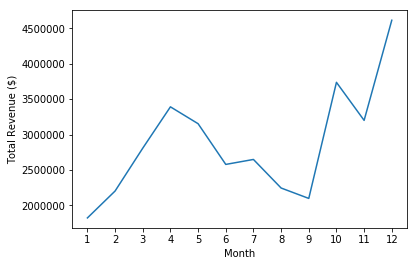

In [310]:
# What month has the most revenue?

months = range(1, 13)

plt.plot(months, results["Total Order Amount"])
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.show()

In [312]:
results = combined_data.groupby("City State").sum()
results.head(20)

,Quantity Ordered,Price Each,Order Month,Total Order Amount,Hour,Minute
City State,,,,,,
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06,214264,442932
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06,141946,289060
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06,288225,590442
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06,214390,435155
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06,427444,866638
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06,357696,733598
"Portland, ME",2750,4.471893e+05,17144,4.497583e+05,35211,72856
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06,144421,295533
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06,643265,1319477


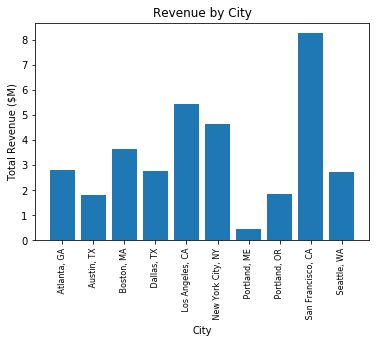

In [313]:
# It is important to group the label data with the bar values
Cities = [city for city, df in combined_data.groupby('City State')]
#Cities = combined_data['City State'].unique()

plt.bar(Cities, results["Total Order Amount"]/1000000)
plt.xticks(Cities, rotation="vertical", size=8)
plt.title("Revenue by City")
plt.xlabel("City")
plt.ylabel("Total Revenue ($M)")
plt.show()

In [287]:
# combined_data.head()

In [314]:
# Convert Order Date using to_datetime method
combined_data["Order Date"] = pd.to_datetime(combined_data["Order Date"])

# Add Hour column (Thanks to to_date!)
combined_data['Hour'] = combined_data['Order Date'].dt.hour
combined_data['Minute'] = combined_data['Order Date'].dt.minute
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Order Amount,City,State,City State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",9,27


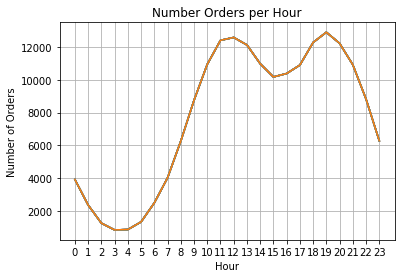

In [315]:
Hours = [hour for hour, df in combined_data.groupby('Hour')]
plt.plot(Hours, combined_data.groupby(['Hour']).count())
plt.xticks(Hours)
plt.grid()
plt.title("Number Orders per Hour")
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()


In [ ]:
# What products are sold together the most?

In [327]:
# First lets list all the orders that have duplicate order ID's
df = combined_data[combined_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\Trevo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [359]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


In [ ]:
# What product sold the most? Why?

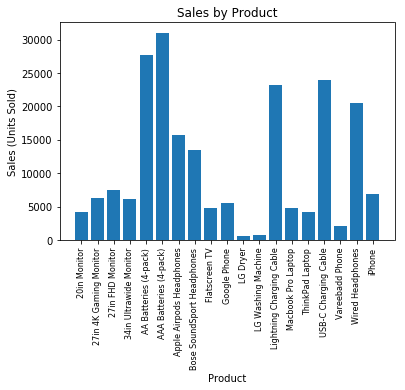

In [360]:
product_group = combined_data.groupby('Product')
quantity_order = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_order)

plt.xticks(products, rotation="vertical", size=8)
plt.title("Sales by Product")
plt.xlabel("Product")
plt.ylabel("Sales (Units Sold)")
plt.show()

In [361]:
prices = combined_data.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


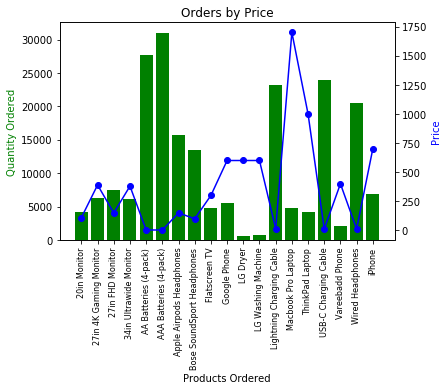

In [368]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_order, color='g')
ax2.plot(products, prices, 'o-', color='b')

ax1.set_xlabel('Products Ordered')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.set_title("Orders by Price")
plt.show()

